<a href="https://colab.research.google.com/github/yudhiesh1997/Tensorflow-Tutorial/blob/master/Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [3]:
# Fsahion MIST dataset
# 70000 images in 10 categories at 28x28 pixels
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# train_images and train_labels are the training set
# test_images and test_labels are used for testing 


4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape


(60000, 28, 28)

In [7]:
len(train_images)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
train_labels.shape

(60000,)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_images)

10000

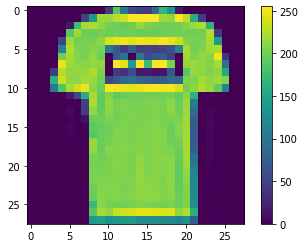

In [15]:
# Preprocess the data 
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# Images need to be scaled to 0 -> 1
train_images = train_images / 255.0
test_images = test_images / 255.0

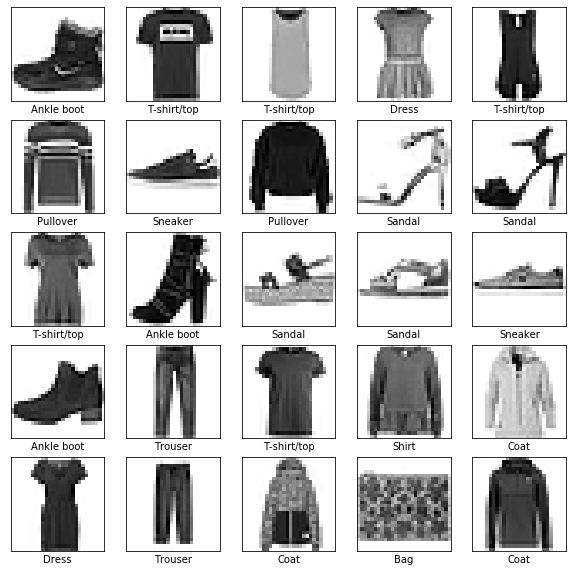

In [18]:
# Check whether images are in the correct format 
# Before training the data 
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
# Build the model 
# Setting up the layers
# Mostly just chaining up layers 
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10)
])

In [0]:
# Compile the model
# Before training the model needs more settings 
# Loss funcntion - shows the error(lower is better)
# Optimizer - How model is updated based on the data it sees and the loss fucntion
# Metrics - Used for moitoring the training and testing steps i.e accuracy 

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [0]:
# Training the model 
# 1.Feed the data to the mode - train_images & train_labels
# 2.Model learns to associate images and labels 
# 3.Ask the model to make predictions - test_images
# 4.Verify the predictions match the labels from the test labels 


In [22]:
# 1.Feed the model
model.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4956 - accuracy: 0.8238
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3749 - accuracy: 0.8661
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3383 - accuracy: 0.8764
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3109 - accuracy: 0.8852
Epoch 5/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2941 - accuracy: 0.8925
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2801 - accuracy: 0.8966
Epoch 7/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2686 - accuracy: 0.9010
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2569 - accuracy: 0.9039
Epoch 9/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2493 - accuracy: 0.9073
Epoch 10/10
60

In [23]:
# 3.Evaluate accuracy 
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose =1)
print('\nTest Accuracy: ', test_acc)
# Test accuracy is less than trainig accuracy 

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3296 - accuracy: 0.8847

Test Accuracy:  0.8847


In [0]:
# The gap between training accuracy and testing accuracy is known as
# OVERFITTING 
# Overfitted model memorizes the noise and details therefore is 
# unable to make accurate guesses on the test data


In [0]:
# Make predictions 
# Attach a softmax layer to convert logits to probabilities
# Logits = models linear outputs
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])


In [25]:
predictions = probability_model(test_images)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [27]:
predictions[0]
# Prediction is an array of 10 num
# These are the models confidence that it corresponds to each of the 10 labels


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.1080665e-06, 2.1106283e-08, 4.3553726e-08, 5.0341303e-08,
       1.6509946e-07, 5.9734457e-03, 7.8918157e-07, 4.0452424e-02,
       2.2540806e-05, 9.5354944e-01], dtype=float32)>

In [28]:
np.argmax(predictions[0])
# Model says its probably label 9

9

In [29]:
test_labels[0]
# Label is 9 so it was correct

9

In [0]:
# Graph this look 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


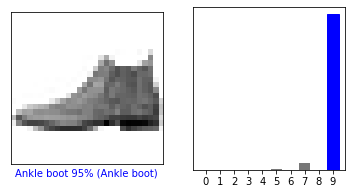

In [43]:
# Model is trained so test it out on some predcitions 
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

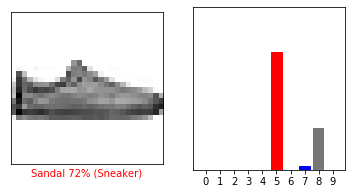

In [44]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

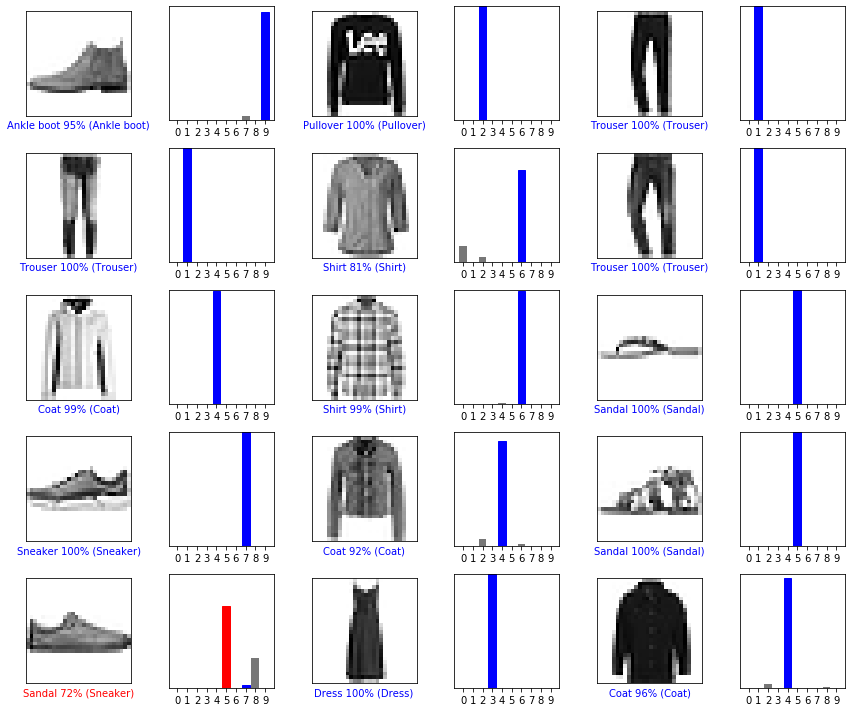

In [45]:
# Plot several images with their predictions 
# Model can be wrong even when very confidet 
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [46]:
# Use the trained model 
img = test_images[1]
print(img.shape)

(28, 28)


In [47]:
# Add the image to a batch where its the only member
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [48]:
# Predict the correct label for this image 
predictions_single = probability_model(img)
print(predictions_single)

tf.Tensor(
[[3.9484507e-06 5.4018476e-15 9.9980932e-01 1.5067755e-10 1.4816636e-04
  4.1912372e-13 3.8671857e-05 1.1536411e-12 2.4546889e-09 1.0428572e-10]], shape=(1, 10), dtype=float32)


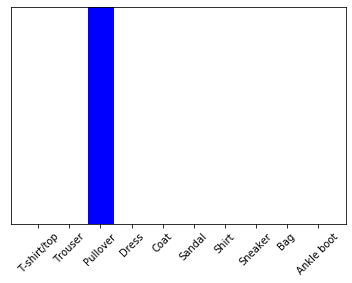

In [50]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [49]:
np.argmax(predictions_single[0])

2